# Did it rain in Seattle? (1948 - 2017)

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
base_color = sns.color_palette()[0]

In [72]:
df = pd.read_csv('seattleWeather_1948-2017.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


## Assessing

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 798.5+ KB


In [74]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [75]:
df[df['RAIN'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [76]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


### Problems
- Column names are uppercase
- Date is not in datetime type
- Rain is not in boolean
- Three dates have no rain data

## Cleaning

### Rename columns

In [77]:
df_orig = df

In [78]:
df = df_orig.copy()

In [79]:
df.columns = ['date', 'precipitation', 'max_temperature', 'min_temperature', 'rain']

In [80]:
df.head()

,date,precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


### Datetype fix

In [88]:
df['date'] = pd.to_datetime(df['date'])
df['rain'] = df['rain'].astype(bool)

## Derived variables

### Month

In [111]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['date'].dt.month_name(), categories=month_order, ordered=True)

In [118]:
df['year'] = df['date'].dt.year

In [119]:
df.head()

,date,precipitation,max_temperature,min_temperature,rain,month,year
0,1948-01-01,0.47,51,42,True,January,1948
1,1948-01-02,0.59,45,36,True,January,1948
2,1948-01-03,0.42,45,35,True,January,1948
3,1948-01-04,0.31,45,34,True,January,1948
4,1948-01-05,0.17,45,32,True,January,1948


# Univariate Explorations

## How many days does it rain?

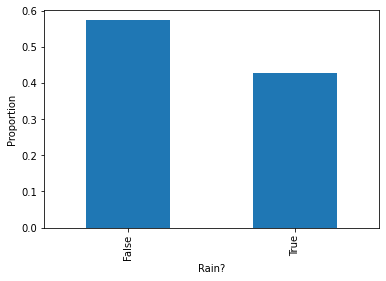

In [99]:
(df['rain'].value_counts() / len(df)).plot.bar()
plt.ylabel('Proportion')
plt.xlabel('Rain?');
plt.yscale()

## What is the temperature distribution like?

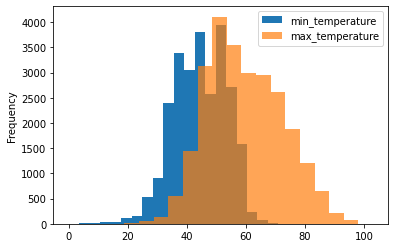

In [105]:
df['min_temperature'].plot.hist(bins=20)
df['max_temperature'].plot.hist(bins=20, alpha=0.7)
plt.legend()

### What is the precipitation distribution like?

<AxesSubplot:ylabel='Frequency'>

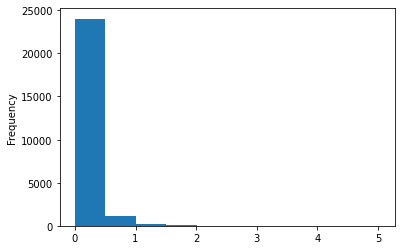

In [114]:
df['precipitation'].plot.hist()

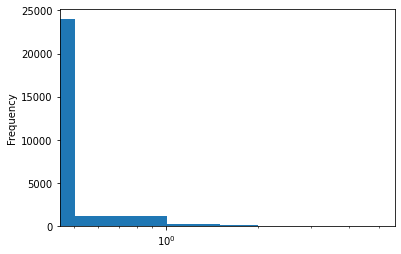

In [117]:
df['precipitation'].plot.hist()
plt.xscale('log')

In [146]:
all((df['precipitation'] == 0) != df['rain'])

True

## Bivariate exploration

### Minimum temperature vs maximun temperature - is the gap always the same?

<AxesSubplot:xlabel='min_temperature', ylabel='max_temperature'>

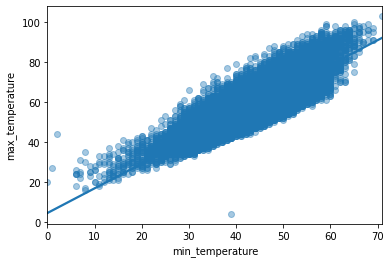

In [123]:
sns.regplot(data=df, x='min_temperature', y='max_temperature', scatter_kws={'alpha': 0.4})

In [125]:
temp_diffs = df['max_temperature'] - df['min_temperature']

In [127]:
temp_diffs.describe()

count    25551.000000
mean        15.029979
std          6.834089
min        -35.000000
25%         10.000000
50%         14.000000
75%         19.000000
max         42.000000
dtype: float64

### Rainy days per month

<AxesSubplot:xlabel='month', ylabel='rain'>

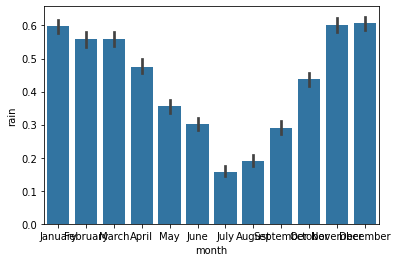

In [136]:
sns.barplot(data=df, x='month', y='rain', color=base_color)

### Rainy days by year

<AxesSubplot:xlabel='year', ylabel='rain'>

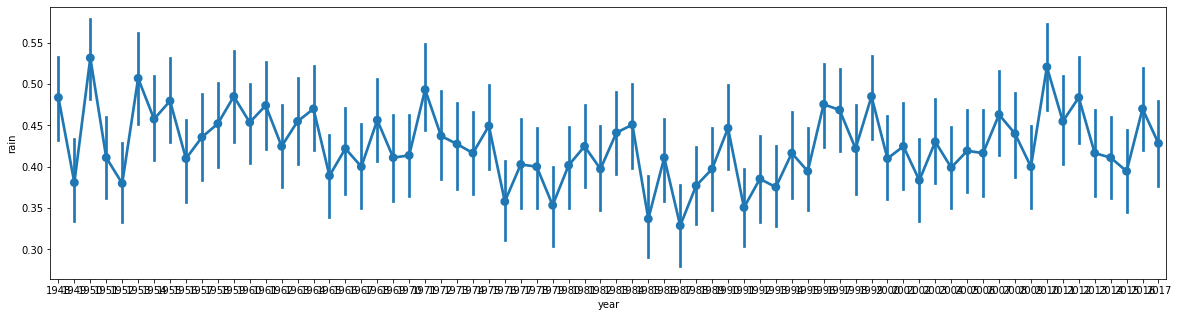

In [139]:
plt.figure(figsize=(20, 5))
sns.pointplot(data=df, x='year', y='rain', color=base_color)

### Temperature by month

Text(0, 0.5, 'min, max temperatures')

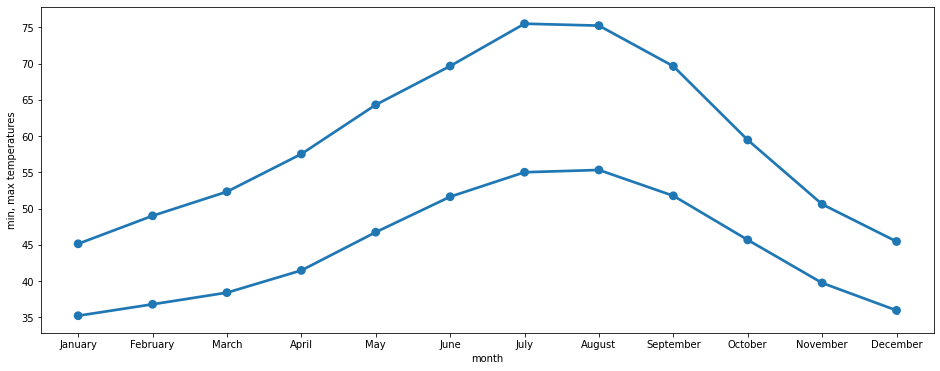

In [143]:
plt.figure(figsize=(16, 6))
sns.pointplot(data=df, x='month', y='min_temperature')
sns.pointplot(data=df, x='month', y='max_temperature')
plt.ylabel('min, max temperatures')

### Temperature vs precipitation

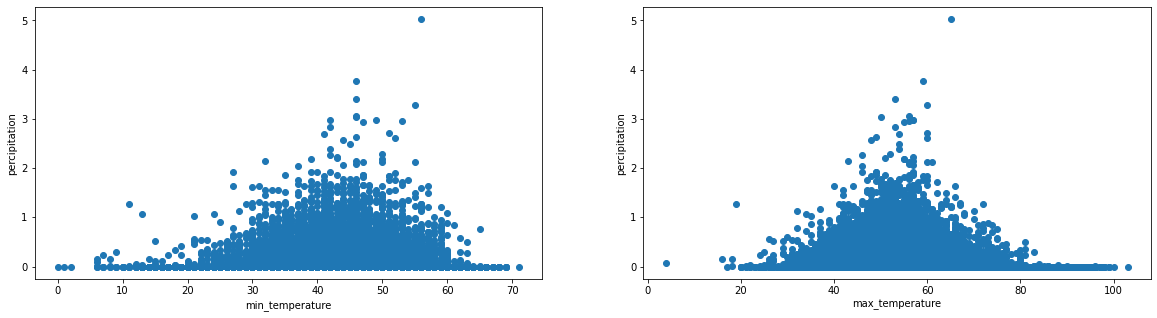

In [158]:
plt.figure(figsize=(20, 5))
for i, column in enumerate(['min_temperature', 'max_temperature']):
    plt.subplot(1, 2, i + 1)
    plt.scatter(data=df, x=column, y='precipitation')
    plt.xlabel(column)
    plt.ylabel('percipitation')